<H1>Distance-dependent connectivity between inhibitory neurons</H1>

In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
# objective function
def sigmoid(x, A, C, r):
    """
    solves for the following 1igmoid function:
    f(x; A, C, r )=( A  / ( 1 + np.exp((x-C)/r)))
    
    where x is the independent variable
    A is the maximal amplitude of the curve
    C is the half point of the sigmoidal function
    r is rate of maximum population growth 
    """
    return  A  / ( 1 + np.exp((x-C)/r))

<H2>Chemical Synapses</H2>

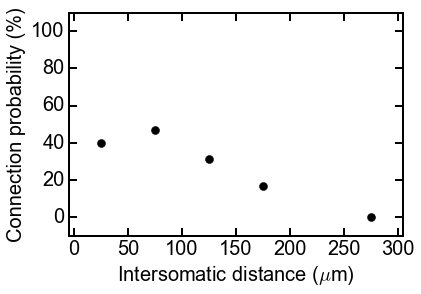

In [3]:
# Plot probabilities of inhibitory chemical synapses between inhibitory neurons
ichem_found  = np.array([10, 30, 29, 12, 2, 4], dtype=int)
ichem_tested = np.array([4,  14,  9,  2, 0, 0], dtype=float)

yval = (ichem_tested/ichem_found)*100
xval = arange(25,350,50) # bins
xval = array([ 25,  75, 125, 175,275, 325])

plt.plot(xval, yval, 'ko');
plt.ylim(-10,110), plt.xlim(-5, 305);
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connection probability (%)');

In [4]:
pinit = [50, 150, 15] # initial guess for amplitude, half-width and slope
lower_bounds = (0, 0, 15)
upper_bounds = (100, 300, 100)
mybounds = ((lower_bounds, upper_bounds))
popt, pcov = curve_fit(f=sigmoid, xdata= xval, ydata= yval, p0 = pinit, \
                        method='trf', bounds=mybounds)
print(popt)

[  43.81621996  158.32340624   28.59547282]


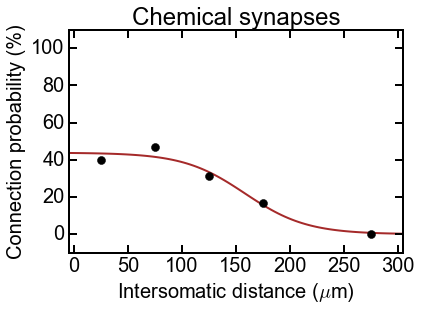

In [5]:
xfit = np.linspace(-5,305, 100)
yfit = sigmoid(xfit, popt[0], popt[1], popt[2])
plt.plot(xfit, yfit, color='brown')

plt.plot(xval, yval, 'ko');
plt.ylim(-10,110), plt.xlim(-5, 305);
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connection probability (%)');
plt.title('Chemical synapses');

<H2>Chemical Synapses</H2>

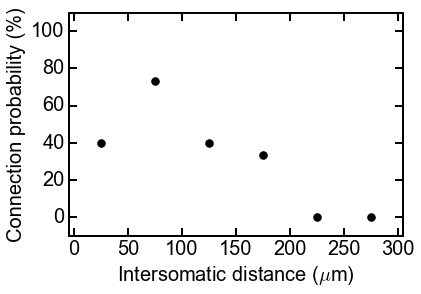

In [6]:
# Plot probabilities of inhibitory electrical synapses between inhibitory neurons
ichem_found  = np.array([ 5, 15, 15, 6, 4, 1,  2], dtype=int)
ichem_tested = np.array([ 2, 11,  6, 2, 0, 0,  0], dtype=float)

yval = (ichem_tested/ichem_found)*100
xval = arange(25,350,50) # bins

plt.plot(xval, yval, 'ko');
plt.ylim(-10,110), plt.xlim(-5, 305);
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connection probability (%)');

In [7]:
pinit = [50, 150, 15] # initial guess for amplitude, half-width and slope
lower_bounds = (0, 0, 15)
upper_bounds = (100, 300, 100)
mybounds = ((lower_bounds, upper_bounds))
popt, pcov = curve_fit(f=sigmoid, xdata= xval, ydata= yval, p0 = pinit, \
                        method='trf', bounds=mybounds)
print(popt)

[  52.43180212  181.06990349   17.88657298]


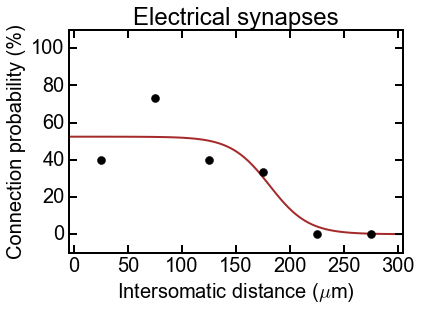

In [8]:
xfit = np.linspace(-5,305, 100)
yfit = sigmoid(xfit, popt[0], popt[1], popt[2])
plt.plot(xfit, yfit, color='brown')

plt.plot(xval, yval, 'ko');
plt.ylim(-10,110), plt.xlim(-5, 305);
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connection probability (%)');
plt.title('Electrical synapses');